# Final Project

# Nobel Prize Winners: 1901-2020

# Group Number: 57

### Presented by: 
 

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; padding-top: 10px; padding-bottom: 10px; font-family: 'Arial';">
    <img src="https://github.com/Shirelmaleh/new_project/raw/main/photo%20prix%20nobel.jpg" width="70%" height="20%" alt="Centered Image" />
</h1>

In [28]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
url = "https://github.com/Shirelmaleh/new_project/raw/main/nobel_prize_by_winner.csv"

try:
    nobel_df = pd.read_csv(url)
except pd.errors.ParserError:
    print("Error reading CSV file. Trying alternative method...")

In [30]:
nobel_df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [31]:
nobel_df.shape

(972, 20)

In [32]:
type(nobel_df)

pandas.core.frame.DataFrame

In [33]:
nobel_df.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

# Analyse by gender 

In [34]:
nobel_df['gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [35]:
filter_gender=nobel_df.loc[(nobel_df['gender']=="male")|(nobel_df['gender']=="female")]

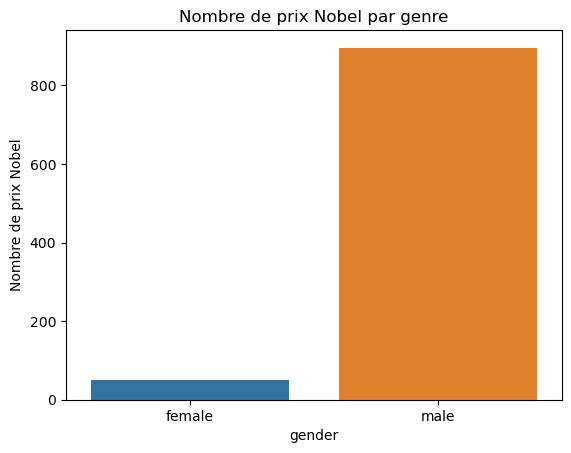

In [36]:
sns.countplot(data=filter_gender, x='gender')
plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel par genre')
plt.show()

We can see that there is a majority of men and very few women who win Nobel prizes.

# The link between Category & Man/Woman

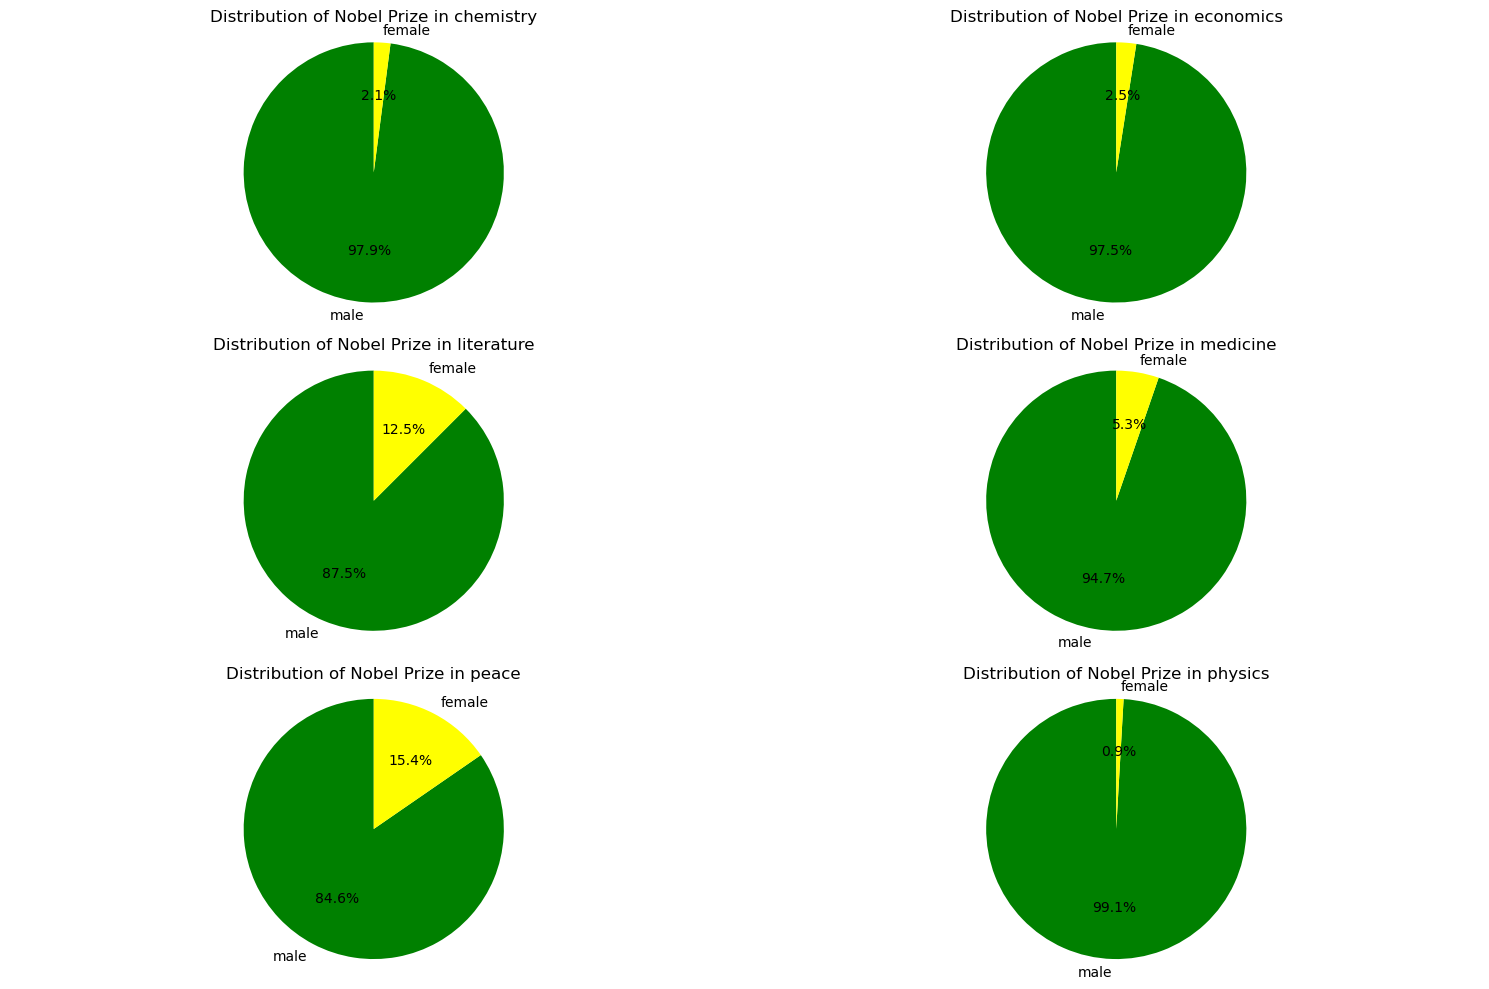

In [37]:
nobel_counts = nobel_df.groupby(['category', 'gender']).size().unstack()
categories = nobel_counts.index
num_categories = len(categories)
num_cols = 2  
num_rows = (num_categories + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
if num_rows == 1:
    axs = axs.reshape(1, -1)
for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    category_data = pd.Series([nobel_counts.loc[category, 'male'], nobel_counts.loc[category, 'female']], index=['male', 'female'])
    ax.pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow'])
    ax.set_title(f'Distribution of Nobel Prize in {category}')
    ax.axis('equal')
for i in range(len(categories), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

La place de la femme en fonction des category

On voit ici que dans la catégorie de la paix, le pourcentage de femmes est le plus élevé par rapport à toutes les autres catégories.

Peut-être devrions-nous examiner la catégorie de la paix et vérifier dans quelles années les femmes ont le plus gagné. Peut-être que nous obtiendrons quelque chose d'intéressant, peut-être que nous découvrirons qu'elles ont gagné beaucoup juste après la Seconde Guerre mondiale, ce qui nous fait conclure qu'elles voulaient que le monde soit meilleur, donc elles ont fait plus d'efforts dans ce domaine.

Regarde juste en dessous j'ai essayer ( très moche)

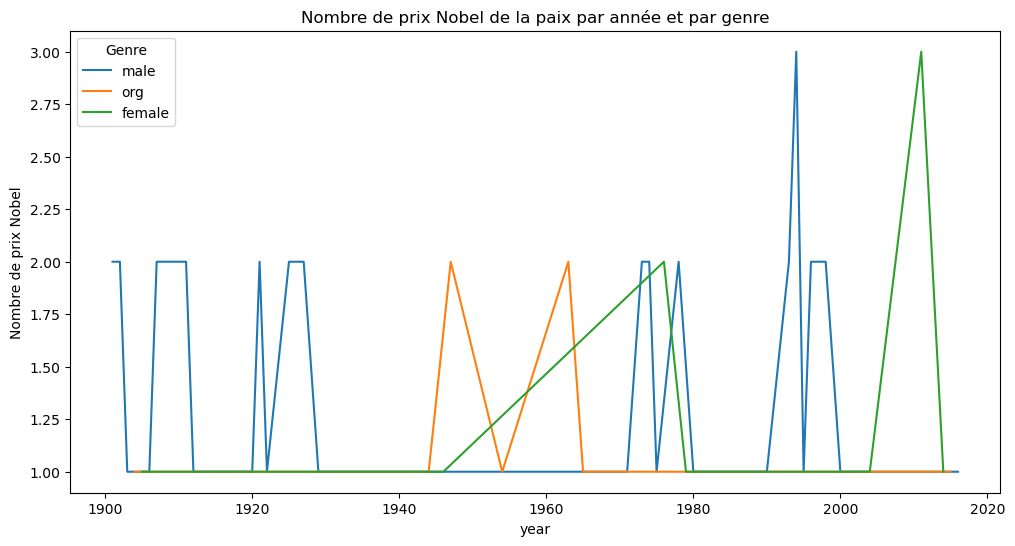

In [38]:
nobel_df_peace = nobel_df[nobel_df['category'] == 'peace']
nobel_counts = nobel_df_peace.groupby(['year', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')
plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel de la paix par année et par genre')
plt.legend(title='Genre')
plt.show()


# Evolution of Nobel Prize Reception Over the Years

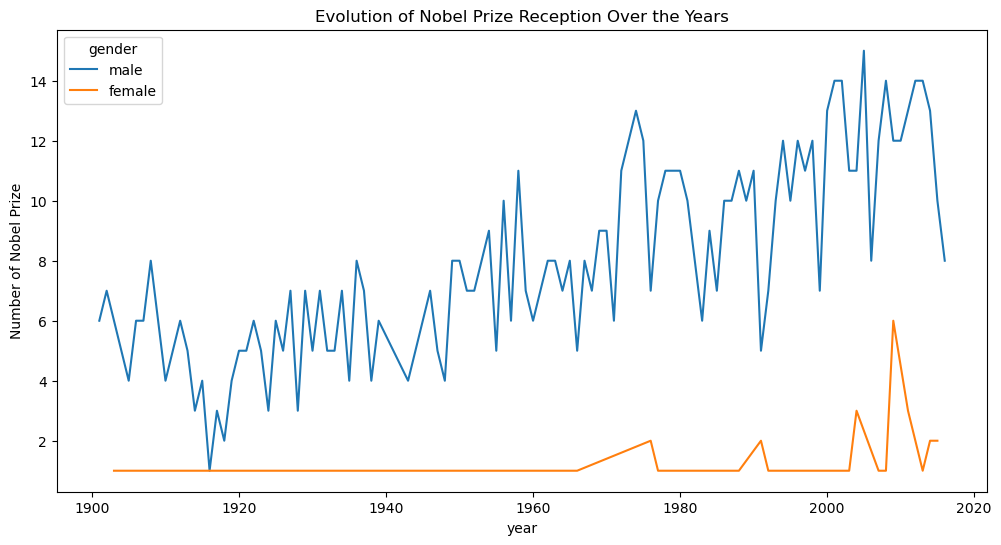

In [39]:
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')
plt.ylabel('Number of Nobel Prize')
plt.title("Evolution of Nobel Prize Reception Over the Years")
plt.show()

Au cours des années plus de femmes ont gagner des prix -> On voit l'evolution de la place de la femme.

As the years progress and the world advances in women's rights, more and more women are winning Nobel prizes.

Conclusion part one:
Women have historically occupied a relatively small place compared to men in receiving Nobel prizes. However, over time, they have gradually managed to stand out in society, resulting in an increasing number of Nobel awards. They have particularly excelled in the fields of literature and peace."





# Pays plus fort 

We check the data associated with the countries to make sure that all the data is correct.

In [40]:
all_country= nobel_df["country"].unique()
nobel_df[['country']].describe()
count_country= nobel_df[["country"]].value_counts()

In [41]:
nobel_counts =list(count_country.values)
print(nobel_counts)
len(nobel_counts)

[361, 91, 51, 40, 26, 22, 18, 17, 11, 11, 9, 7, 6, 6, 6, 6, 5, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


29

In [42]:
name_country= list(count_country.index)
print(name_country)
len(name_country)

[('USA',), ('United Kingdom',), ('Germany',), ('France',), ('Federal Republic of Germany',), ('Switzerland',), ('Japan',), ('Sweden',), ('USSR',), ('the Netherlands',), ('Denmark',), ('Canada',), ('Belgium',), ('Austria',), ('Italy',), ('Australia',), ('Israel',), ('Norway',), ('Russia',), ('China',), ('Argentina',), ('Portugal',), ('Alsace (then Germany, now France)',), ('Spain',), ('Ireland',), ('Hungary',), ('Finland',), ('Czechoslovakia',), ('India',)]


29

C:\Users\shire\AppData\Local\Temp\ipykernel_5592\2841274660.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\shire\AppData\Local\Temp\ipykernel_5592\2841274660.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


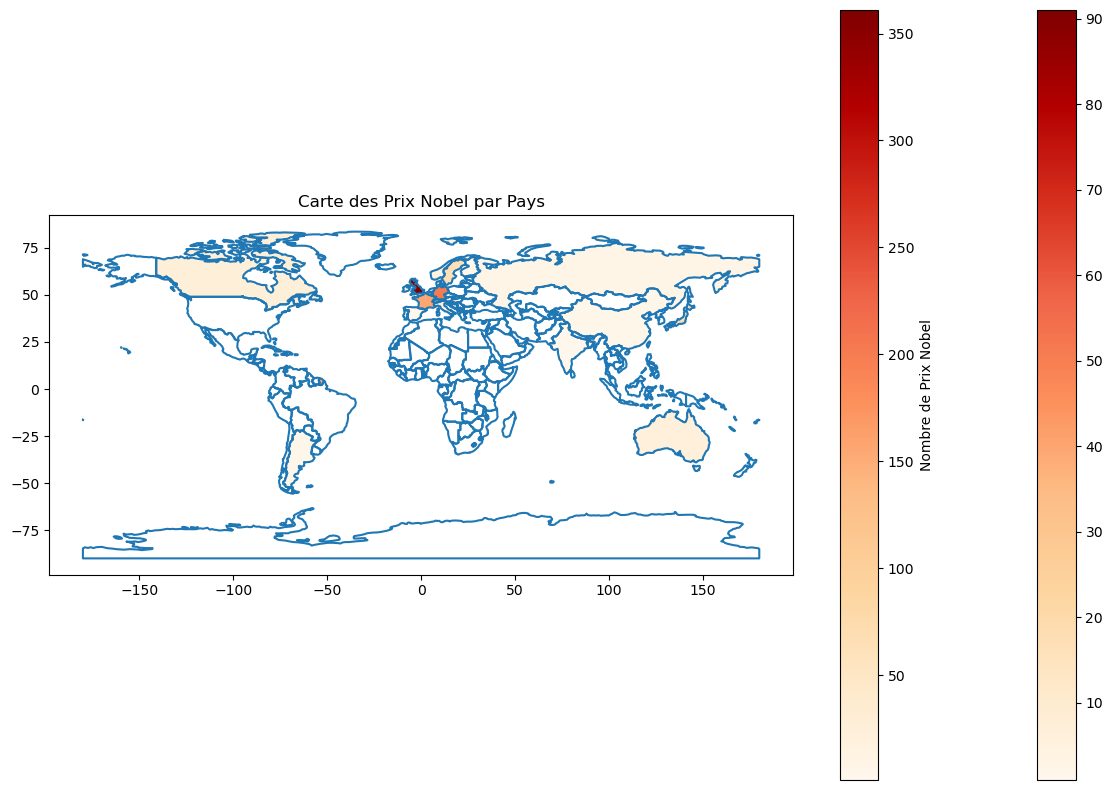

In [43]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_counts = pd.DataFrame({
    'country': name_country,
    'nobel_count': nobel_counts
})

df_counts['country'] = df_counts['country'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

world = world.merge(df_counts, left_on='name', right_on='country', how='left')

fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='nobel_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=df_counts['nobel_count'].min(), vmax=df_counts['nobel_count'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Nombre de Prix Nobel')

plt.title('Carte des Prix Nobel par Pays')
plt.show()




When analyzing which countries have won the most Nobel Prizes, we can conclude from this map that the United States, the United Kingdom, Germany, and France are the most powerful countries, and thus the countries that have won the most awards overall.

# Distribution of Women by Country

In [44]:
nobel_df.loc[nobel_df['country'].isin(['Germany', 'Federal Republic of Germany']), 'country'] = 'Germany'
nobel_df.loc[nobel_df['country'].isin(['France', 'Alsace']), 'country'] = 'France'
count_country= nobel_df['country'].value_counts()

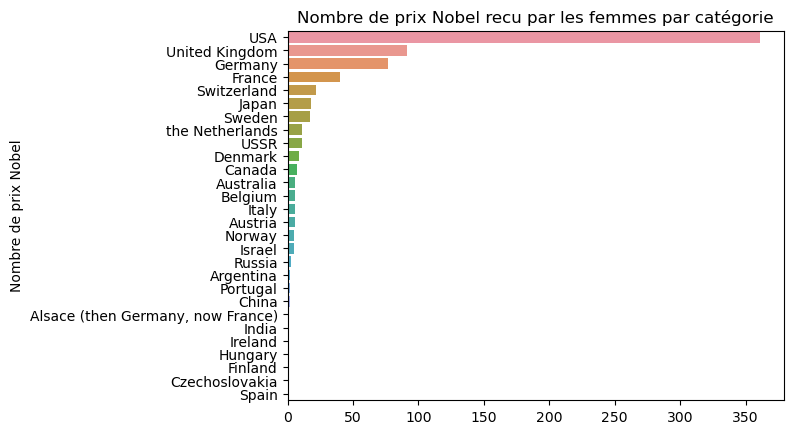

In [45]:
filtered_df = nobel_df[(nobel_df['gender'] == 'female')]
sns.barplot(data=filtered_df, y=count_country.index,x=count_country.values)
plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel recu par les femmes par catégorie')
plt.show()

We see that very few countries have awarded women. The five most powerful countries shown earlier on the map are also the top five countries that have played a role in the evolution of women's recognition.

# Women before and after 1980."

In [46]:
female= nobel_df[nobel_df['gender'] == 'female']

In [47]:
before1980= len(nobel_df[(nobel_df['gender'] == 'female')&(nobel_df["year"] <= 1980)])
after1980= len(nobel_df[(nobel_df['gender'] == 'female')&(nobel_df["year"] >= 1980)])

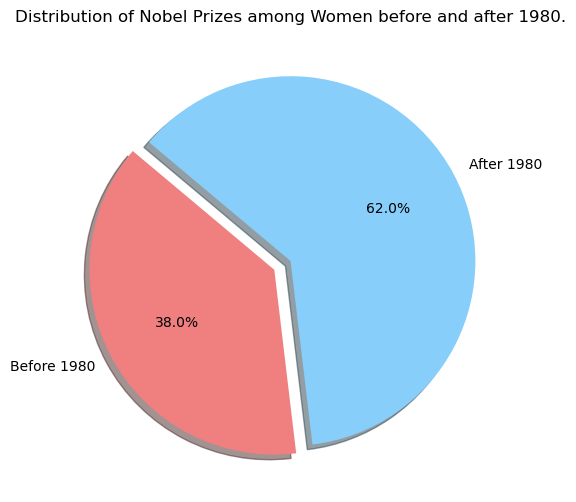

In [48]:
labels = ['Before 1980', 'After 1980']
sizes = [before1980, after1980]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Nobel Prizes among Women before and after 1980.")
plt.show()

We can observe that there are more women who have received Nobel prizes after 1980 and therefore that women are gradually coming to the fore after 1980.

# Conclusion du point

We see that very few countries have awarded women. The five most powerful countries shown on the map earlier are also the top five countries that have played a significant role in advancing the recognition of women.

# Category-Age

In [49]:
nobel_df[["born"]].dtypes

born    object
dtype: object

Pourquoi avons-nous besoin de la ligne ci-dessus ? Verifier si c'est quel type pck on veux changer les date de born 01/05/20 en datatime

In [50]:
nobel_df['born'] = pd.to_datetime(nobel_df['born'], format='%d/%m/%Y', errors='coerce')

In [51]:
nobel_df[['born']].dtypes

born    datetime64[ns]
dtype: object

elle aussi ?et du coup la on a verifier si on a transformer d'ojet en datatime

In [52]:
nobel_df["bornyear"] = pd.DatetimeIndex(nobel_df['born']).year


"Que dit la ligne ci-dessus ? Pourquoi est-elle utile ? Et que signifie .year"  Du coup la j'ai crée une colone bornyear qui renvoie que les années pas toute la date. Elle  a fait ca dans ces premiers cours .

In [53]:
nobel_df['year'] = pd.to_numeric(nobel_df['year'], errors='coerce')
nobel_df['bornyear'] = pd.to_numeric(nobel_df['bornyear'], errors='coerce')
nobel_df["category"].unique()

array(['economics', 'peace', 'chemistry', 'medicine', 'literature',
       'physics', nan], dtype=object)

<Axes: xlabel='category', ylabel='age'>

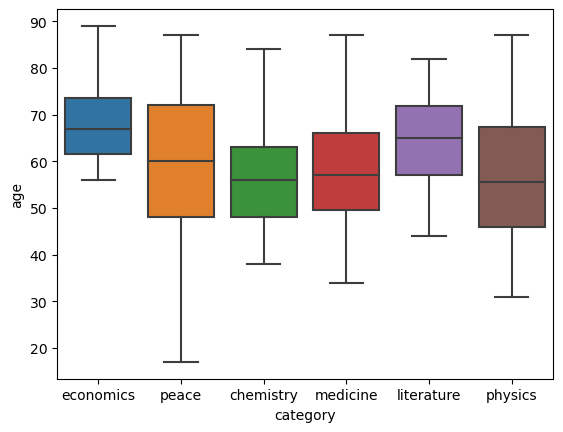

In [54]:
nobel_df['age'] = (nobel_df['year'] - nobel_df['bornyear'])
sns.boxplot(x='category', y='age', data=nobel_df)

We can therefore see that the age range varies according to category.we also observe that it is older people who win prizes. it starts at the age of 50. 

# Age-Decade

In [55]:
nobel_df_year_age = nobel_df[nobel_df['year'].notna() & nobel_df['age'].notna()]

C:\Users\shire\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


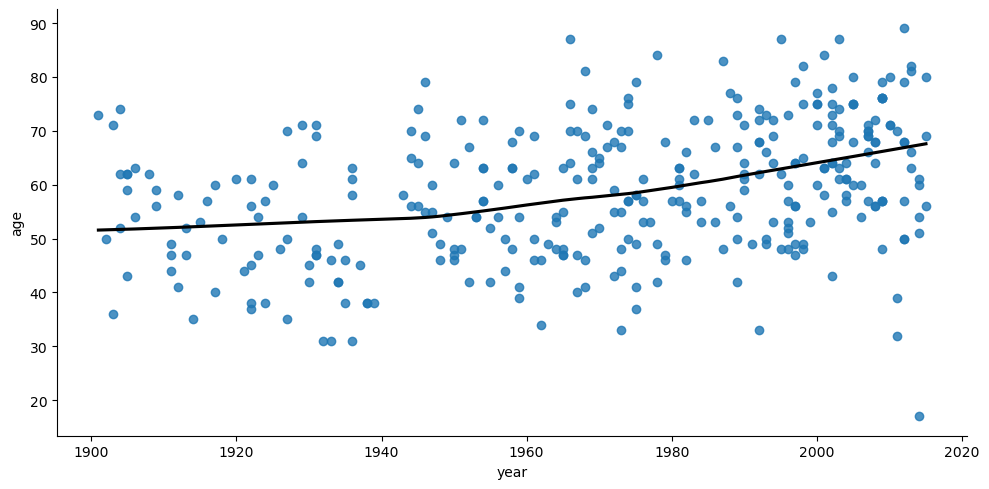

In [56]:

sns.lmplot(x='year', y='age', data=nobel_df_year_age , lowess=True, aspect=2, line_kws={'color': 'black'})

"Tu as pris ce code d'un autre endroit ? Je pense qu'il n'est pas très clair. Je ne comprends pas comment il se termine et il imprime aussi des lignes étranges."

je l'ai pris du lien que tu m'avais envoyer sur kaggle . Moi je le trouve bien pck il nous montre une exception dans l'age (20 ans ).
On voit aussi que plus les année passe plus de nombre de pric nobel augmente (plus de point au fur et amesure de temps )
on peut voir aussi que entre 39 et 45 y'a plus de recompense a cause de la guerre surement 

We can see in this graph the average age, as we mentioned earlier, which is typically quite high, ranging between 40 and 75 years old. However, there is an exception in 2018 when the youngest recipient was under 20 years old. We can also observe an increase in the number of Nobel Prizes awarded over time, with a noticeable pause in awards between 1939 and 1945, likely due to the war.

# Motivation

In [57]:
La j'aurai voulu montrer que l'exception , la personne de - 20 ans etait pour la paix (ca fait un petit lien).
De la on dis qu'on observe quels mots qui decrit sa motivation lui as permis de gagner (Mais j'ai rien trouver mon montrer juste que l'exception est = paix )
donc je suis aller direct dans l'exception de  20 et sa motivation 

SyntaxError: unterminated string literal (detected at line 2) (3806018637.py, line 2)

In [ ]:
category_youngage = nobel_df.loc[nobel_df['age'] <= 20, 'motivation']

In [ ]:
text = ' '.join(category_youngage.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud of motivations for winners under 20 years of age', fontsize=20, color='red', fontweight='bold')
plt.show()

C'est la category de la paix

What are the most common words used by Nobel Prize nominees?

In [ ]:
text = ' '.join(nobel_df['motivation'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I want to show if the most recurrent words change over time, to see if they have a different purpose.

In [ ]:
import matplotlib.pyplot as plt
years = [1920, 1960, 1980, 2010]

fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(20, 5))
#juste le enumerate chat GPT (je pense on peux les garder)
for i, year in enumerate(years):
    motivations = nobel_df.loc[nobel_df['year'] == year, 'motivation']
    text = ' '.join(motivations.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud - {year}')
    axes[i].axis("off")

plt.tight_layout()
plt.show()


We can see that the recurring motivational words change according to the decade. 

We can see that in the 1920s, the world was more focused on the following areas:"discovery" ,"Work", "recognition".         
We can see that in the 1920s, the world was more focused on the following areas:"discovery" ,"acquired".           
We can see that in the 1920s, the world was more focused on the following areas:"concerning" ,"fundamental", "acid".         
We can see that in the 1920s, the world was more focused on the following areas:"analysis" ,"markets".

In [ ]:
#sans chat gpt moche et j'arrive pas a les mettre les un a cote des autre
motivations_1920 = nobel_df.loc[nobel_df['year'] == 1920, 'motivation']
text = ' '.join(motivations_1920.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

motivations_1960 = nobel_df.loc[nobel_df['year'] == 1960, 'motivation']
text = ' '.join(motivations_1960.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

motivations_1980 = nobel_df.loc[nobel_df['year'] == 1980, 'motivation']
text = ' '.join(motivations_1980.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

motivations_2008 = nobel_df.loc[nobel_df['year'] == 2008, 'motivation']
text = ' '.join(motivations_2008.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

motivations_2017 = nobel_df.loc[nobel_df['year'] == 2017, 'motivation']
text = ' '.join(motivations_2017.dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




# Brouillon a verifier

In [ ]:
count_gender= nobel_df['gender'].value_counts()
count_gender

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylabel("Number of Nobel awards")
ax.set_title("gender")
sns.barplot( x = count_gender.index, y = count_gender);
plt.show()

In [ ]:
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')
sns.lineplot(data=nobel_counts, x='year', y='count', hue='gender')
plt.ylabel('Nombre de prix Nobel')
plt.title('Nombre de prix Nobel par année et par genre')
plt.show()

In [ ]:
filter_gender = nobel_df[(nobel_df['gender'] == 'male') | (nobel_df['gender'] == 'female')]
nobel_counts = filter_gender.groupby(['year', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(10,7))
sns.histplot(data=nobel_counts, x='year', hue='gender', multiple = 'stack',bins= 25)
plt.xlabel('Année')
plt.title('Nombre de prix Nobel par année et par genre')
plt.show()

In [ ]:
sns.lmplot(x='year', y='age', data=nobel_df_year_age, lowess=True, aspect=2, line_kws={'color': 'black'}, row="category", height=4)

"Le code n'est pas très bien écrit, je pense qu'il vient d'un autre endroit et il semble nécessiter des modifications. Les graphiques ne s'affichent pas correctement du tout, et aussi, dans tous les graphiques, l'axe des x ne montre pas les années."

In [ ]:
different_category= nobel_df['category'].unique()
all_category = nobel_df[['category']].value_counts()
nobel_df[['category']].describe()

In [ ]:
plt.figure(1, figsize=(6,6))
plt.title("Different Category")
all_category.plot.pie(autopct="%1.1f%%")

"Nous pouvons vérifier dans chaque pays dans quelle catégorie ils réussissent le mieux, puis l'intégrer dans le graphique circulaire que vous avez fait ci-dessus. C'est la seule utilisation que je vois pour cela."